# 필요패키지 import

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
from torchvision.utils import make_grid

# GPU or CPU

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)

cpu


# MNIST Data 불러오기

In [3]:
mnist_train = dsets.MNIST(root="MNIST_data/", 
                          train = True, 
                          transform = transforms.ToTensor(), 
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform = transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



# Data 확인

In [4]:
# train data 하나 확인(이미지 텐서 값과 레이블 값으로 구성)
mnist_train[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
img, label = mnist_train[0]
print(img.shape)
print(label)

torch.Size([1, 28, 28])
5


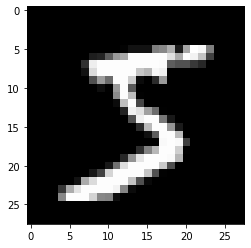

In [6]:
plt.imshow(img.reshape(28, 28), cmap="gray")

# DataLoader

In [7]:
train_loader = DataLoader(dataset=mnist_train,
                          batch_size =64, 
                          shuffle=True)


test_loader = DataLoader(dataset=mnist_test,
                         batch_size=64, 
                         shuffle=False)

In [8]:
def show_batch(dl):
    for batch in dl:
        images,labels = batch
        fig, ax = plt.subplots(figsize=(7.5,7.5))
        ax.set_yticks([])
        ax.set_xticks([])
        ax.imshow(make_grid(images[:20],nrow=5).permute(1,2,0))
        break

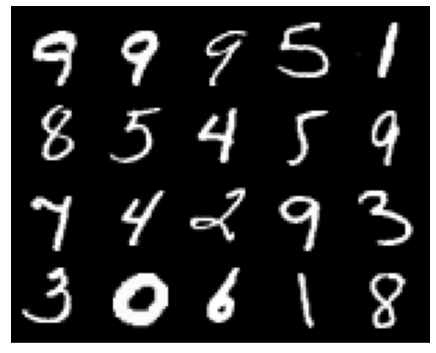

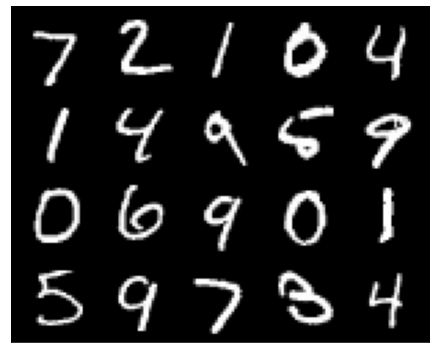

In [9]:
show_batch(train_loader)
show_batch(test_loader)

# 모델 설계(MLP+Dropout(0.3))

In [17]:
# 3층
model = nn.Sequential(nn.Linear(784,392),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                      
                      nn.Linear(392,196),
                      nn.ReLU(),
                      
                      nn.Linear(196,10)

                      )
model

Sequential(
  (0): Linear(in_features=784, out_features=392, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=392, out_features=196, bias=True)
  (4): ReLU()
  (5): Linear(in_features=196, out_features=10, bias=True)
)

In [11]:
# 5층
model1 = nn.Sequential(nn.Linear(784,512),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                       
                      nn.Linear(512,256),
                      nn.ReLU(),
                      nn.Dropout(0.3), 
                       
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                       
                      nn.Linear(128, 64),
                      nn.ReLU(),
                       
                      nn.Linear(64, 10)

                      )
model1

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): ReLU()
  (11): Linear(in_features=64, out_features=10, bias=True)
)

In [12]:
# 7층
model2 = nn.Sequential(nn.Linear(784,512),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                       
                      nn.Linear(512,256),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                        
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                       
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                        
                      nn.Linear(64, 32),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                        
                      nn.Linear(32, 16),
                      nn.ReLU(),
                       
                      nn.Linear(16, 10)
                      )


model2

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.3, inplace=False)
  (12): Linear(in_features=64, out_features=32, bias=True)
  (13): ReLU()
  (14): Dropout(p=0.3, inplace=False)
  (15): Linear(in_features=32, out_features=16, bias=True)
  (16): ReLU()
  (17): Linear(in_features=16, out_features=10, bias=True)
)

# 모델 설계(MLP+Dropout(0.5))

In [16]:
# 3층
model3 = nn.Sequential(nn.Linear(784,392),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                      
                      nn.Linear(392,196),
                      nn.ReLU(),
                      
                      nn.Linear(196,10)

                      )
model3

Sequential(
  (0): Linear(in_features=784, out_features=392, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=392, out_features=196, bias=True)
  (4): ReLU()
  (5): Linear(in_features=196, out_features=10, bias=True)
)

In [18]:
# 5층
model4 = nn.Sequential(nn.Linear(784,512),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                       
                      nn.Linear(512,256),
                      nn.ReLU(),
                      nn.Dropout(0.5), 
                       
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                       
                      nn.Linear(128, 64),
                      nn.ReLU(),
                       
                      nn.Linear(64, 10)

                      )
model4

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): ReLU()
  (11): Linear(in_features=64, out_features=10, bias=True)
)

In [40]:
# 7층
model5 = nn.Sequential(nn.Linear(784,512),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                       
                      nn.Linear(512,256),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                        
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                       
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                        
                      nn.Linear(64, 32),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                        
                      nn.Linear(32, 16),
                      nn.ReLU(),
                       
                      nn.Linear(16, 10)
                      )


model5

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.5, inplace=False)
  (12): Linear(in_features=64, out_features=32, bias=True)
  (13): ReLU()
  (14): Dropout(p=0.5, inplace=False)
  (15): Linear(in_features=32, out_features=16, bias=True)
  (16): ReLU()
  (17): Linear(in_features=16, out_features=10, bias=True)
)

# 모델 설계(MLP+Dropout(0.7))

In [20]:
# 3층
model6 = nn.Sequential(nn.Linear(784,392),
                      nn.ReLU(),
                      nn.Dropout(0.7),
                      
                      nn.Linear(392,196),
                      nn.ReLU(),
                      
                      nn.Linear(196,10)

                      )
model6

Sequential(
  (0): Linear(in_features=784, out_features=392, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.7, inplace=False)
  (3): Linear(in_features=392, out_features=196, bias=True)
  (4): ReLU()
  (5): Linear(in_features=196, out_features=10, bias=True)
)

In [21]:
# 5층
model7 = nn.Sequential(nn.Linear(784,512),
                      nn.ReLU(),
                      nn.Dropout(0.7),
                       
                      nn.Linear(512,256),
                      nn.ReLU(),
                      nn.Dropout(0.7), 
                       
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Dropout(0.7),
                       
                      nn.Linear(128, 64),
                      nn.ReLU(),
                       
                      nn.Linear(64, 10)

                      )
model7

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.7, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.7, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.7, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): ReLU()
  (11): Linear(in_features=64, out_features=10, bias=True)
)

In [22]:
# 7층
model8 = nn.Sequential(nn.Linear(784,512),
                      nn.ReLU(),
                      nn.Dropout(0.7),
                       
                      nn.Linear(512,256),
                      nn.ReLU(),
                      nn.Dropout(0.7),
                        
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Dropout(0.7),
                       
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.7),
                        
                      nn.Linear(64, 32),
                      nn.ReLU(),
                      nn.Dropout(0.7),
                        
                      nn.Linear(32, 16),
                      nn.ReLU(),
                       
                      nn.Linear(16, 10)
                      )


model8

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.7, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.7, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.7, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.7, inplace=False)
  (12): Linear(in_features=64, out_features=32, bias=True)
  (13): ReLU()
  (14): Dropout(p=0.7, inplace=False)
  (15): Linear(in_features=32, out_features=16, bias=True)
  (16): ReLU()
  (17): Linear(in_features=16, out_features=10, bias=True)
)

# loss function & optimizer

In [23]:
# 비용함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

# Train & Test 함수 정의

In [24]:
def train(model, train_loader, optimizer, epoch, criterion):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
      data = data.view(-1,28*28).to(device)
      target = target.to(device)

      optimizer.zero_grad()

      output = model(data)

      loss = criterion(output, target)
      loss.backward()
      optimizer.step()

      if batch_idx % 200 == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.
              format(epoch, batch_idx * len(data), len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.item()))

In [25]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
          data = data.view(-1,28*28).to(device)
          target = target.to(device)

          output = model(data)

          test_loss += criterion(output, target).item()
          pred = output.argmax(dim=1, keepdim=True)
          correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.
          format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))

# epoch별 Train & Test 확인

## **MLP+Dropout(0.3)**

### MLP(3층)

In [26]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [27]:
for epoch in range(1, 11):
    train(model, train_loader, optimizer, epoch, criterion)
    test(model, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316986
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.267818
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.264292
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.270938
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.115152

Test set: Average loss: 0.0042, Accuracy: 9412/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.235601
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.322016
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.559640
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.197254
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.434339

Test set: Average loss: 0.0028, Accuracy: 9524/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.197904
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.038463
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.075638
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.182736
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.110409

Test set: Average loss: 0.0022, Accuracy: 9614/10000 (96%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.256905
Train Epoch: 4 [12800/60000 (21%)]	Lo

### MLP(5층)

In [28]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model1.parameters(),lr=0.01)

In [29]:
for epoch in range(1, 11):
    train(model1, train_loader, optimizer, epoch, criterion)
    test(model1, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.319847
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.466332
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.433940
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.394482
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.363424

Test set: Average loss: 0.0034, Accuracy: 9435/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.198514
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.328382
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.460980
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.671347
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.251229

Test set: Average loss: 0.0041, Accuracy: 9462/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.649759
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.565926
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.208921
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.199260
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.217087

Test set: Average loss: 0.0036, Accuracy: 9514/10000 (95%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.282943
Train Epoch: 4 [12800/60000 (21%)]	Lo

### MLP(7층)

In [30]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model2.parameters(),lr=0.01)

In [31]:
for epoch in range(1, 11):
    train(model2, train_loader, optimizer, epoch, criterion)
    test(model2, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.310123
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.909748
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.693758
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.420303
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.349548

Test set: Average loss: 0.0071, Accuracy: 8886/10000 (89%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.373247
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.713758
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.874006
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.988263
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.770404

Test set: Average loss: 0.0071, Accuracy: 8960/10000 (90%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.693392
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.703108
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.596897
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.571241
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.436975

Test set: Average loss: 0.0068, Accuracy: 9114/10000 (91%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.765745
Train Epoch: 4 [12800/60000 (21%)]	Lo

## **MLP+Dropout(0.5)**

### MLP(3층)

In [32]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model3.parameters(),lr=0.01)

In [33]:
for epoch in range(1, 11):
    train(model3, train_loader, optimizer, epoch, criterion)
    test(model3, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302718
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.487420
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.751189
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.372482
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.196536

Test set: Average loss: 0.0032, Accuracy: 9415/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.402272
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.458337
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.391197
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.597393
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.434642

Test set: Average loss: 0.0029, Accuracy: 9469/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.253126
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.427064
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.387300
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.246572
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.137354

Test set: Average loss: 0.0029, Accuracy: 9482/10000 (95%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.289214
Train Epoch: 4 [12800/60000 (21%)]	Lo

### MLP(5층)

In [34]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model4.parameters(),lr=0.01)

In [35]:
for epoch in range(1, 11):
    train(model4, train_loader, optimizer, epoch, criterion)
    test(model4, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.290718
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.945776
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.739859
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.446360
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.554002

Test set: Average loss: 0.0065, Accuracy: 9080/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.447487
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.003674
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.484473
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.439931
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.598279

Test set: Average loss: 0.0048, Accuracy: 9294/10000 (93%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.507963
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.874322
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.525663
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.594821
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.735017

Test set: Average loss: 0.0045, Accuracy: 9348/10000 (93%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.505062
Train Epoch: 4 [12800/60000 (21%)]	Lo

### MLP(7층) : 성능저하 발생

In [41]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model5.parameters(),lr=0.01)

In [42]:
for epoch in range(1, 11):
    train(model5, train_loader, optimizer, epoch, criterion)
    test(model5, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301510
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.604434
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.532071
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.403493
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.466754

Test set: Average loss: 0.0204, Accuracy: 4910/10000 (49%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.434290
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.449432
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.679702
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.382614
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.441270

Test set: Average loss: 0.0192, Accuracy: 5171/10000 (52%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.695998
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.481917
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.550997
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.587735
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.616859

Test set: Average loss: 0.0240, Accuracy: 4429/10000 (44%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.749247
Train Epoch: 4 [12800/60000 (21%)]	Lo

## **MLP+Dropout(0.7)**

### MLP(3층)

In [43]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model6.parameters(),lr=0.01)

In [44]:
for epoch in range(1, 11):
    train(model6, train_loader, optimizer, epoch, criterion)
    test(model6, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.326639
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.651122
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.742475
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.394036
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.578211

Test set: Average loss: 0.0055, Accuracy: 9143/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.399037
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.396166
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.388471
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.526724
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.258435

Test set: Average loss: 0.0040, Accuracy: 9369/10000 (94%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.268111
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.373564
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.696200
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.462010
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.632453

Test set: Average loss: 0.0040, Accuracy: 9352/10000 (94%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.527101
Train Epoch: 4 [12800/60000 (21%)]	Lo

### MLP(5층): 성능저하 발생

In [45]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model7.parameters(),lr=0.01)

In [46]:
for epoch in range(1, 11):
    train(model7, train_loader, optimizer, epoch, criterion)
    test(model7, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299576
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.495638
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.623051
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.236885
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.260360

Test set: Average loss: 0.0150, Accuracy: 6550/10000 (66%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.394181
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.067342
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.791084
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.080739
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.546849

Test set: Average loss: 0.0147, Accuracy: 6762/10000 (68%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.261235
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.429786
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.565739
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.992237
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.095896

Test set: Average loss: 0.0150, Accuracy: 6503/10000 (65%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.457039
Train Epoch: 4 [12800/60000 (21%)]	Lo

### MLP(7층)

In [47]:
# 모델 돌릴때마다 같이 돌려줘야 model.parameters()값이 초기화됨
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.Adam(model8.parameters(),lr=0.01)

In [48]:
for epoch in range(1, 11):
    train(model8, train_loader, optimizer, epoch, criterion)
    test(model8, test_loader, criterion)
#torch.save(model, './model.pt')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.322977
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.237991
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.847808
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.141562
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.069189

Test set: Average loss: 0.0313, Accuracy: 1930/10000 (19%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.097132
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.943253
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.176617
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.180578
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.059950

Test set: Average loss: 0.0368, Accuracy: 1135/10000 (11%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.188636
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.160019
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.237926
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.325818
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.980218

Test set: Average loss: 0.0316, Accuracy: 1857/10000 (19%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.073196
Train Epoch: 4 [12800/60000 (21%)]	Lo

# Test

### MLP(3층)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9664999842643738
Label: 3
Prediction:  3


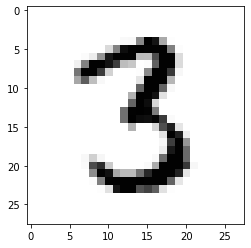

In [ ]:
with torch.no_grad():  
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)

 
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  

  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())



  ######시각화(visualization)######

  r = random.randint(0, len(mnist_test)-1)

  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label:', Y_single_data.item())

  single_prediction = model(X_single_data)
  print("Prediction: ", torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()

### MLP(5층)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9491999745368958
Label: 6
Prediction:  6


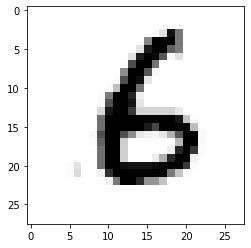

In [ ]:
with torch.no_grad():  
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model1(X_test)

 
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  

  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())



  ######시각화(visualization)######

  r = random.randint(0, len(mnist_test)-1)

  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label:', Y_single_data.item())

  single_prediction = model1(X_single_data)
  print("Prediction: ", torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()

### MLP(7층)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.7357000112533569
Label: 9
Prediction:  8


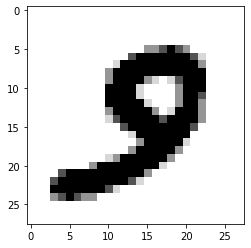

In [ ]:
with torch.no_grad():  
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model2(X_test)

 
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  

  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())



  ######시각화(visualization)######

  r = random.randint(0, len(mnist_test)-1)

  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label:', Y_single_data.item())

  single_prediction = model2(X_single_data)
  print("Prediction: ", torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()